<a href="https://colab.research.google.com/github/Juliana-Arc/Juliana-Arc/blob/main/data_driven_insights.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
#importação de bibliotecas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [5]:
#upload do arquivo
from google.colab import files
uploaded = files.upload()


Saving sales_data_sample.csv to sales_data_sample.csv


In [6]:
#Leitura da base
df = pd.read_csv('sales_data_sample.csv', encoding='latin1')

In [9]:
#Vizualiza as 5 primeiras linhas
print(df.head(5))

   ORDERNUMBER  QUANTITYORDERED  PRICEEACH  ORDERLINENUMBER    SALES  \
0        10107               30      95.70                2  2871.00   
1        10121               34      81.35                5  2765.90   
2        10134               41      94.74                2  3884.34   
3        10145               45      83.26                6  3746.70   
4        10159               49     100.00               14  5205.27   

         ORDERDATE   STATUS  QTR_ID  MONTH_ID  YEAR_ID  ...  \
0   2/24/2003 0:00  Shipped       1         2     2003  ...   
1    5/7/2003 0:00  Shipped       2         5     2003  ...   
2    7/1/2003 0:00  Shipped       3         7     2003  ...   
3   8/25/2003 0:00  Shipped       3         8     2003  ...   
4  10/10/2003 0:00  Shipped       4        10     2003  ...   

                    ADDRESSLINE1  ADDRESSLINE2           CITY STATE  \
0        897 Long Airport Avenue           NaN            NYC    NY   
1             59 rue de l'Abbaye           NaN

In [ ]:
# Mostra formato dos dados
print(df.shape)

(2823, 25)


In [ ]:
# Mostra o nome das colunas

for col in df.columns:
  print(col)

ORDERNUMBER
QUANTITYORDERED
PRICEEACH
ORDERLINENUMBER
SALES
ORDERDATE
STATUS
QTR_ID
MONTH_ID
YEAR_ID
PRODUCTLINE
MSRP
PRODUCTCODE
CUSTOMERNAME
PHONE
ADDRESSLINE1
ADDRESSLINE2
CITY
STATE
POSTALCODE
COUNTRY
TERRITORY
CONTACTLASTNAME
CONTACTFIRSTNAME
DEALSIZE


In [ ]:
#Mostra o tipo das colunas (int - float - object)
print(df.dtypes)

ORDERNUMBER           int64
QUANTITYORDERED       int64
PRICEEACH           float64
ORDERLINENUMBER       int64
SALES               float64
ORDERDATE            object
STATUS               object
QTR_ID                int64
MONTH_ID              int64
YEAR_ID               int64
PRODUCTLINE          object
MSRP                  int64
PRODUCTCODE          object
CUSTOMERNAME         object
PHONE                object
ADDRESSLINE1         object
ADDRESSLINE2         object
CITY                 object
STATE                object
POSTALCODE           object
COUNTRY              object
TERRITORY            object
CONTACTLASTNAME      object
CONTACTFIRSTNAME     object
DEALSIZE             object
dtype: object


In [ ]:
# Lista com os dados da coluna com os 5 primeiros valores.

nomes = list(df['PRODUCTLINE'])
for nome in nomes[:5]:
    print(nome)

# Dicionário: Seleciona os 4 primeiros valores das colunas descritas. Chave e valor, exemplo (nome:categoria)
dicionario = dict(zip(df['PRODUCTLINE'][:4], df['CUSTOMERNAME'][:4]))
print(dicionario)


# Tupla: Seleciona informações de uma linha
linha0 = df.iloc[3]
minha_tupla = (linha0['PRODUCTLINE'], linha0['CUSTOMERNAME'], linha0['CITY'])
print(minha_tupla)

Motorcycles
Motorcycles
Motorcycles
Motorcycles
Motorcycles
{'Motorcycles': 'Toys4GrownUps.com'}
('Motorcycles', 'Toys4GrownUps.com', 'Pasadena')


In [ ]:
# Seleciona o primeiro valor da coluna.
coluna_numerica = 'SALES'
primeiro_valor = df[coluna_numerica][0]

# Verifica valor da variável de acordo com as condicionas descritas.

if primeiro_valor > 5000:
    print("Valor alto")
elif primeiro_valor > 2500:
    print("Valor intermediário")
else:
    print("Valor baixo")

# For para operar sobre n primeiros elementos de uma coluna numérica
soma = 0
lista = list(df[coluna_numerica][:5])
for n in lista:
    soma += n
print("Soma dos 5 primeiros valores:", soma)

# While: Define valor maior que um certo limite.
limite = 5000
i = 0
while i < len(lista) and lista[i] <= limite:
    i += 1
if i < len(lista):
    print("Primeiro valor >", limite, "encontrado:", lista[i])
else:
    print("Nenhum valor maior que", limite, "encontrado nos primeiros 5.")

Valor intermediário
Soma dos 5 primeiros valores: 18473.21
Primeiro valor > 5000 encontrado: 5205.27


In [ ]:
# Cria nova coluna exibindo a diferença entre elas.

if 'QUANTITYORDERED' in df.columns and 'SALES' in df.columns:
    df['Diferenca'] = df['SALES'] - df['QUANTITYORDERED']
    print(df[['SALES', 'QUANTITYORDERED', 'Diferenca']].head())

# Cria nova coluna aplicando desconto de 10% e exibe as 5 primeiras linhas das colunas.
if 'SALES' in df.columns:
    df['Desconto'] = df['SALES'] * 0.9
    print(df[['SALES', 'Desconto']].head())

     SALES  QUANTITYORDERED  Diferenca
0  2871.00               30    2841.00
1  2765.90               34    2731.90
2  3884.34               41    3843.34
3  3746.70               45    3701.70
4  5205.27               49    5156.27
     SALES  Desconto
0  2871.00  2583.900
1  2765.90  2489.310
2  3884.34  3495.906
3  3746.70  3372.030
4  5205.27  4684.743


In [ ]:
import numpy as np
import pandas as pd


In [ ]:
array = np.array(df['SALES'].values)


# Operações NumPy - Soma e Elevação ao quadrado do array.
array_somado = array + 10
array_quadrado = array ** 2

print(array[:5])
print(array_somado[:5])
print(array_quadrado[:5])

print("Soma dos elementos:", array.sum())
print("Média dos elementos:", array.mean())

[2871.   2765.9  3884.34 3746.7  5205.27]
[2881.   2775.9  3894.34 3756.7  5215.27]
[ 8242641.      7650202.81   15088097.2356 14037760.89   27094835.7729]
Soma dos elementos: 10032628.85
Média dos elementos: 3553.889071909316


In [ ]:

# Operações  - Agrupamentos
vendas_ano = df.groupby("YEAR_ID")["SALES"].sum()
print("Vendas por ano:\n", vendas_ano)

vendas_produto = df.groupby("PRODUCTLINE")["SALES"].sum()
print("Vendas por produto:\n", vendas_produto)

Vendas por ano:
 YEAR_ID
2003    3516979.54
2004    4724162.60
2005    1791486.71
Name: SALES, dtype: float64
Vendas por produto:
 PRODUCTLINE
Classic Cars        3919615.66
Motorcycles         1166388.34
Planes               975003.57
Ships                714437.13
Trains               226243.47
Trucks and Buses    1127789.84
Vintage Cars        1903150.84
Name: SALES, dtype: float64


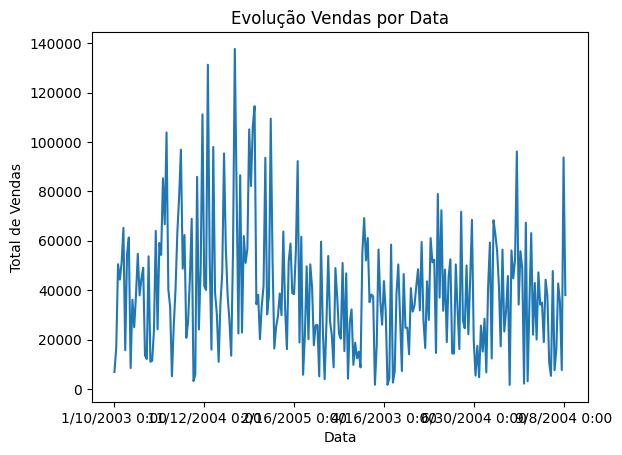

In [27]:
# Gráfico de Linha (ex: evolução temporal; use 'Data' se houver)
if 'ORDERDATE' in df.columns and 'SALES' in df.columns:
    df.groupby('ORDERDATE')['SALES'].sum().plot(kind='line')
    plt.title('Evolução Vendas por Data')
    plt.xlabel('Data')
    plt.ylabel('Total de Vendas')
    plt.show()

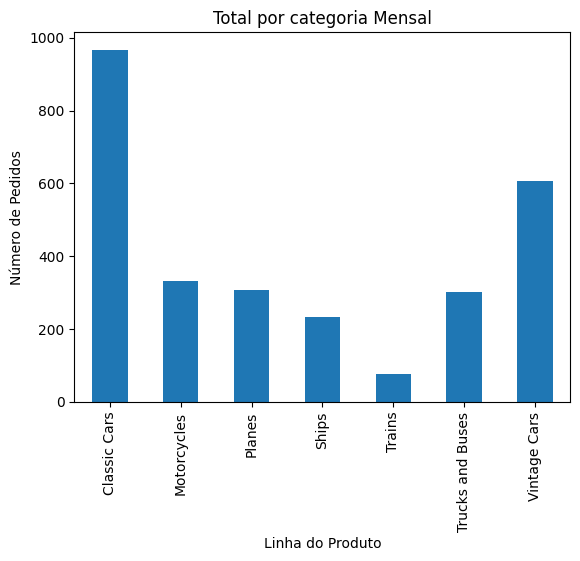

In [28]:

# Gráfico de Barras (categorias)
if 'PRODUCTLINE' in df.columns and 'ORDERDATE' in df.columns:
    df.groupby('PRODUCTLINE')['ORDERDATE'].count().plot(kind='bar')
    plt.title('Total por categoria Mensal')
    plt.xlabel('Linha do Produto')
    plt.ylabel('Número de Pedidos')
    plt.show()

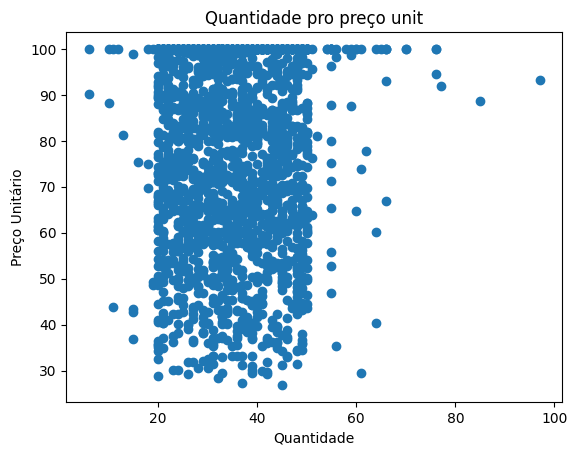

In [29]:
# Gráfico de Dispersão (duas numéricas)
if 'QUANTITYORDERED' in df.columns and 'PRICEEACH' in df.columns:
    plt.scatter(df['QUANTITYORDERED'], df['PRICEEACH'])
    plt.title('Quantidade pro preço unit')
    plt.xlabel('Quantidade')
    plt.ylabel('Preço Unitário')
    plt.show()

Mini Projeto Orientado Data-Driven Insights - Análises de dados de Vendas, com base na seguinte fonte: https://www.kaggle.com/datasets/kyanyoga/sample-sales-data?resource=download.

Os dados estão na base sales_data_sample.csv. A análise foi feita com Pyton, utilizando as bibliotecas Pandas, Numpy e Matplotlib.



